In [1]:
import sys
from os.path import expanduser

# Add path to folder containing safepy
sys.path.append(expanduser('~') + '/Lab/Utils/Python/Networks/safepy/')

import safe

%matplotlib inline

# Example 1 -- Annotating the genetic interaction similarity network

In this example, SAFE is run with all the default settings:
* the network is the genetic interaction similarity network from Costanzo et al., 2016
* the attribute is a doxorubicin sensitivity screen from Hoepfner et al., 2014

In [2]:
sf = safe.SAFE()

In [3]:
sf.load_network()

Loading network from /Users/abaryshnikova/Lab/Datasets/safe-data/networks/Costanzo_Science_2016.gpickle


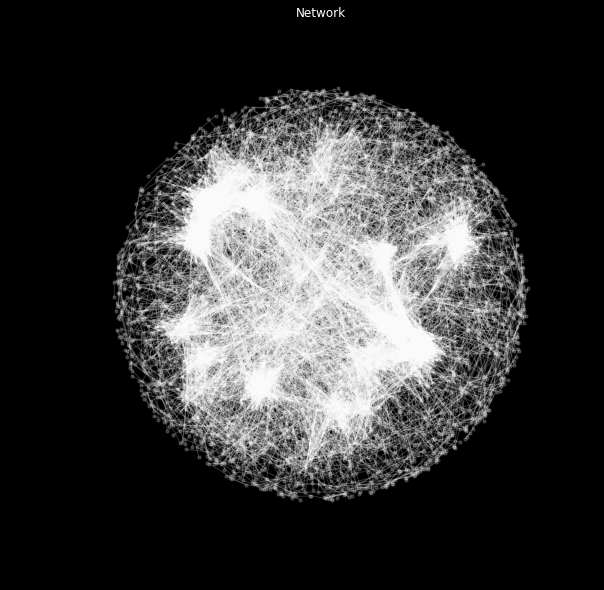

In [4]:
sf.plot_network()

In [5]:
sf.define_neighborhoods()

Node distance metric: shortpath_weighted_layout
Neighborhood definition: 0.10 x diameter
Number of nodes per neighborhood (mean +/- std): 37.50 +/- 56.74


In [6]:
sf.load_attributes()

Loading attributes from /Users/abaryshnikova/Lab/Datasets/safe-data/attributes/hoepfner_movva_2014_doxorubucin.txt

Attribute data provided: 6649 labels x 1 attributes
YAL003W, YAL004W, YAL005C and 3011 other labels in the attribute file were not found in the network.

Attribute data mapped onto the network: 3635 labels x 1 attributes
Values: 1315 NaNs
Values: 1 zeros
Values: 1335 positives
Values: 1320 negatives


In [7]:
# # Alternatively to the default attribute, you can specify an attribute file to be used instead of the default settings:
# # For format specifications, check the example attribute file. The main format requirements are:
# # * the first column contains the node labels (in this case, yeast ORFs)
# # * each column is an attribute
    
# sf.load_attributes(attribute_file='hoepfner_movva_2014_doxorubucin.txt')

In [7]:
sf.compute_pvalues(num_permutations=1000)

Using randomization to calculate enrichment...
Current settings (possibly overwriting global ones):
	num_permutations=1000


100%|██████████| 1000/1000 [00:53<00:00, 18.77it/s]


In [13]:
# Alternatively, run the same permutations in parallel using 8 cores on this machine
# sf.compute_pvalues(num_permutations=1000, processes=8)

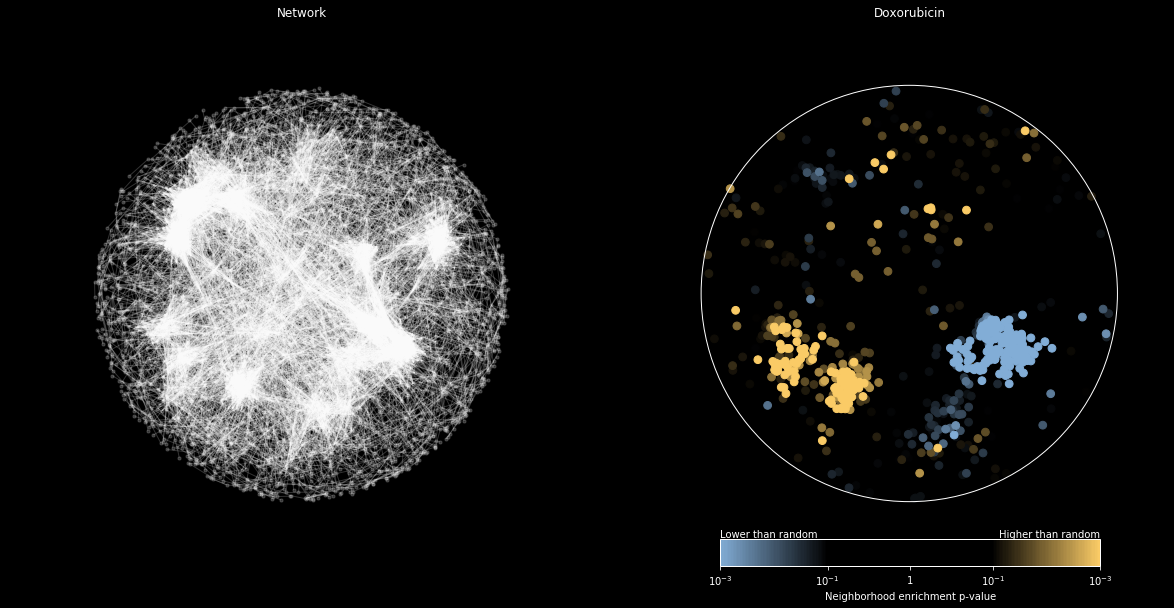

In [12]:
# Plot a random attribute
sf.plot_sample_attributes()

# Also, can specify the name of the attribute to be plotted (Note: to get the list of available attributes, check sf.attributes.head())
# sf.plot_sample_attributes(attributes=['Doxorubicin'])


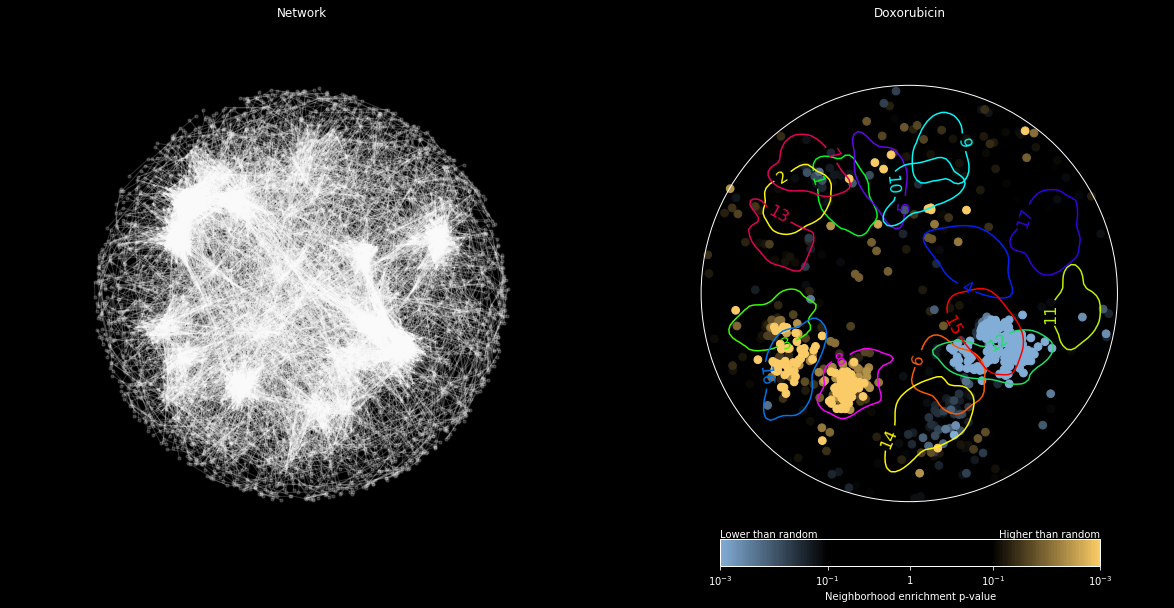

In [15]:
# Show the contours of the functional clusters from Costanzo et al., 2016
sf.plot_sample_attributes(show_costanzo2016=True)

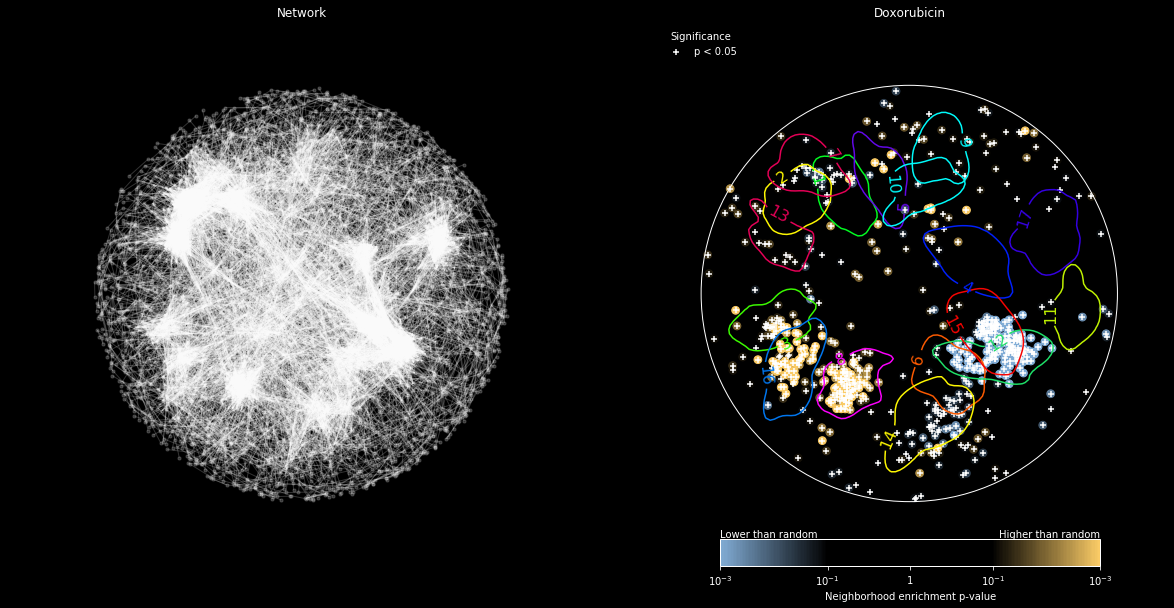

In [16]:
# Map the significant nodes
sf.plot_sample_attributes(show_costanzo2016=True, show_significant_nodes=True)

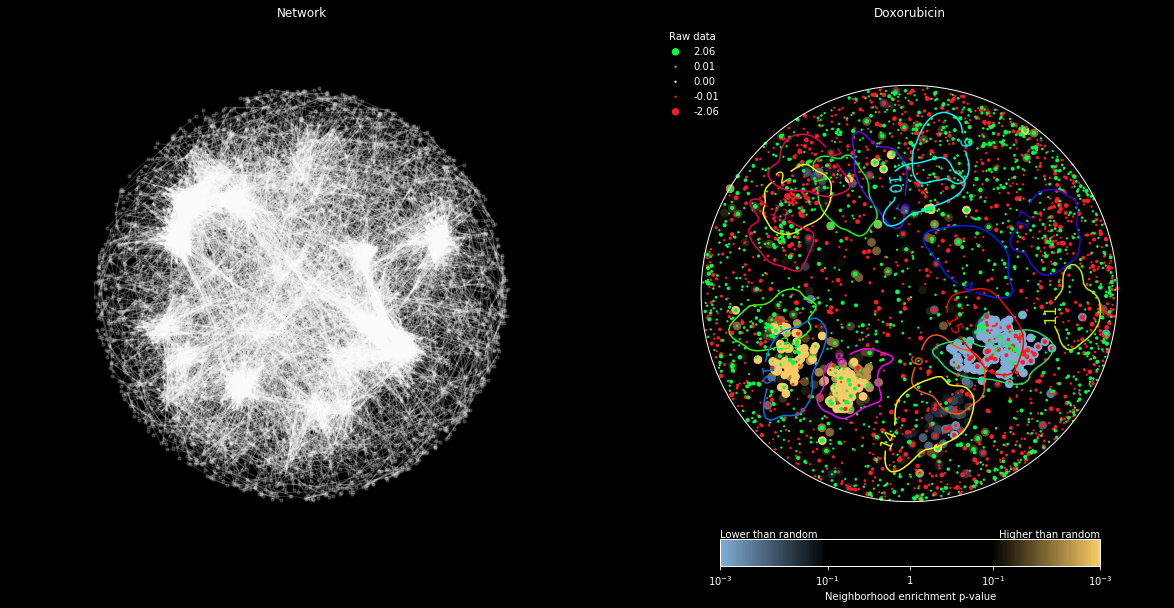

In [17]:
# Map the raw data onto the network
sf.plot_sample_attributes(show_costanzo2016=True, show_raw_data=True)

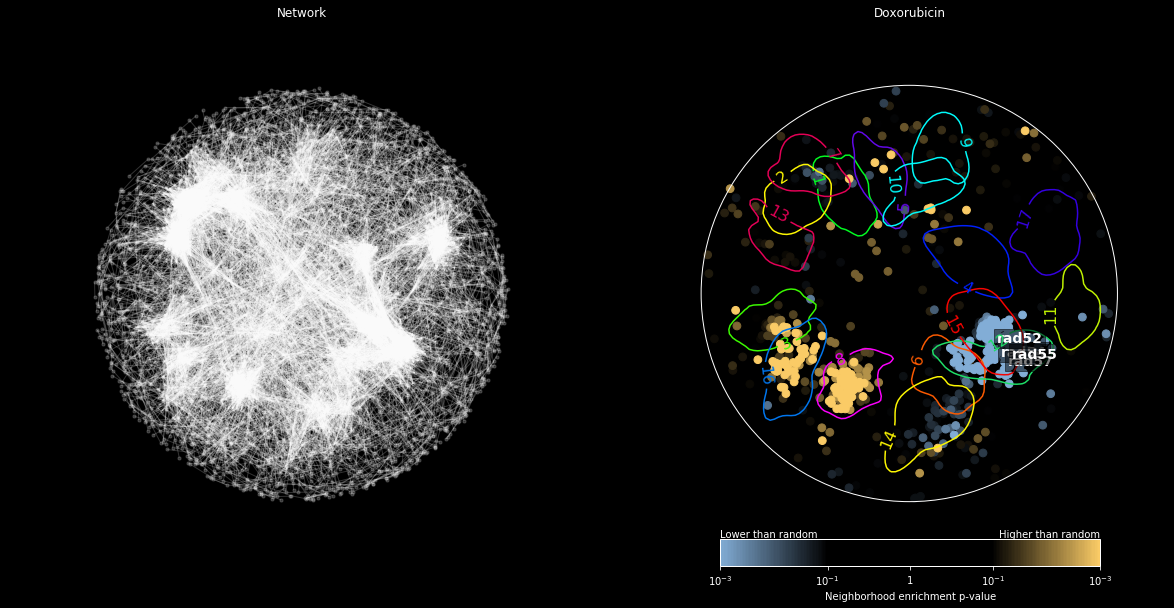

In [18]:
# Map a few labels onto the network
sf.plot_sample_attributes(show_costanzo2016=True, labels=['rad54','rad57','rad55','rad52'])

Output path: ./doxorubicin.pdf


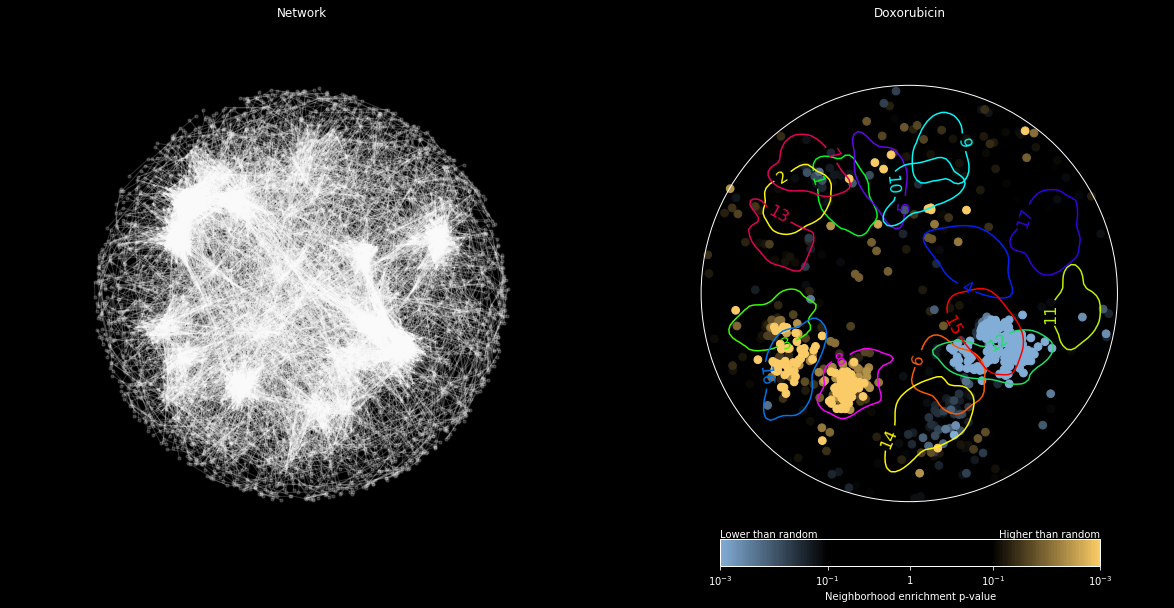

In [21]:
# Show the figure and save it to a PDF file
sf.plot_sample_attributes(show_costanzo2016=True, save_fig='./doxorubicin.pdf')

In [20]:
# Print output files into the current directory
sf.print_output_files(output_dir='./')

./attribute_properties_annotation.txt
./node_properties_annotation.txt
